In [70]:
import pandas as pd

df = pd.read_csv("./Data/Crop_recommendation.csv")


In [71]:
print(df.head())
print(df['label'].value_counts())# Check label distribution
print(df.info())
print(df.describe())

    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice
label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  -

In [72]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [73]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [74]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [75]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])  # 'label' column should contain crop names like "rice", "apple", etc.

# Then save it
import joblib
joblib.dump(le, 'label_encoder.pkl')

['label_encoder.pkl']

In [76]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,5


In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(df.drop('label',axis = 1))
y = df['label']

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.svm import SVC

models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=100000, solver= 'lbfgs'),
    "XGBoost": XGBClassifier( eval_metric='mlogloss'),
    "Gradient Boosting" :GradientBoostingClassifier(),
    "svc":SVC()
    
}


In [80]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report


    



Random Forest Accuracy: 0.99
Average CV Score: 0.9945454545454545
🔍 Precision (weighted): 0.9937348484848485
📈 Recall (weighted): 0.9931818181818182
⚖️ F1 Score (weighted): 0.9931754816901672


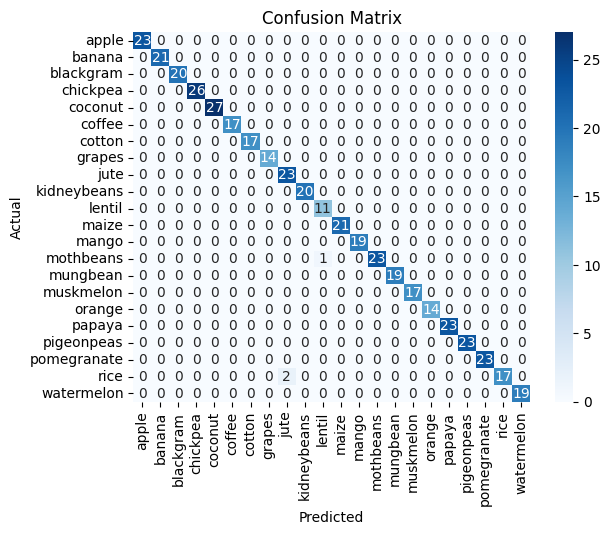

______________________________________________________
Logistic Regression Accuracy: 0.96
Average CV Score: 0.9713636363636363
🔍 Precision (weighted): 0.9644420567548909
📈 Recall (weighted): 0.9636363636363636
⚖️ F1 Score (weighted): 0.9635115059268677


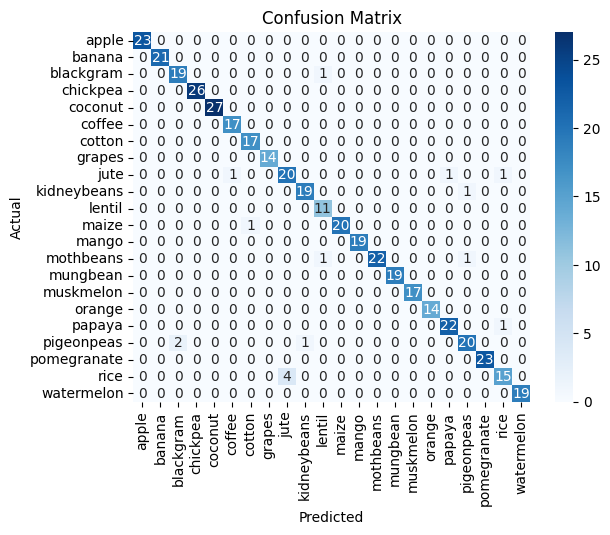

______________________________________________________
XGBoost Accuracy: 0.99
Average CV Score: 0.9927272727272728
🔍 Precision (weighted): 0.9869011544011543
📈 Recall (weighted): 0.9863636363636363
⚖️ F1 Score (weighted): 0.986347164805032


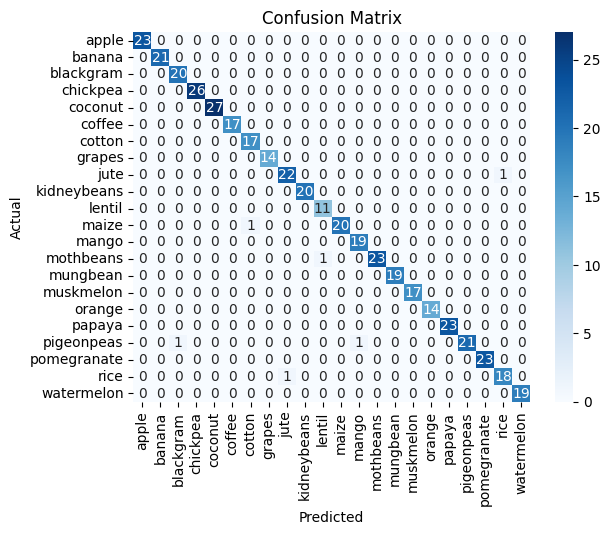

______________________________________________________
Gradient Boosting Accuracy: 0.98
Average CV Score: 0.9909090909090909
🔍 Precision (weighted): 0.9842712842712842
📈 Recall (weighted): 0.9818181818181818
⚖️ F1 Score (weighted): 0.9818514668069125


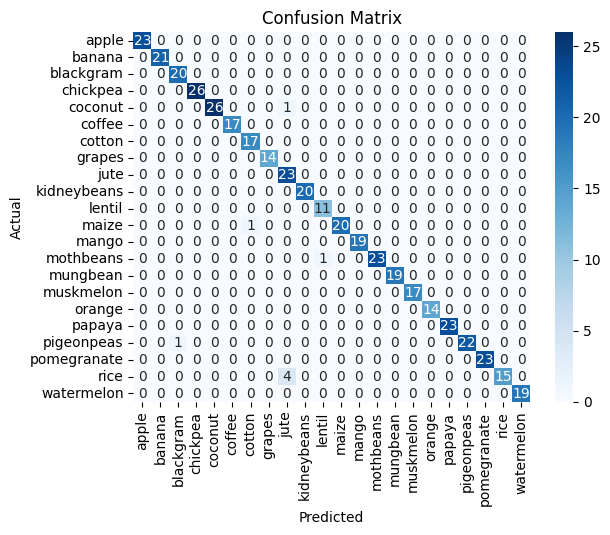

______________________________________________________
svc Accuracy: 0.97
Average CV Score: 0.9822727272727272
🔍 Precision (weighted): 0.9715171192443921
📈 Recall (weighted): 0.9681818181818181
⚖️ F1 Score (weighted): 0.9680271341017991


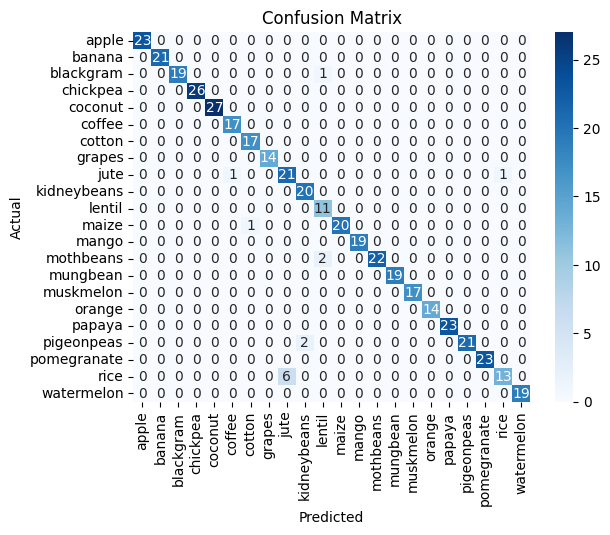

______________________________________________________


In [81]:

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"{name} Accuracy: {acc:.2f}")
    cv_scores = cross_val_score(model, x, y, cv=5)
    print("Average CV Score:", cv_scores.mean())
    # For individual scores (macro, micro, weighted)
    precision = precision_score(y_test, preds, average='weighted')
    recall = recall_score(y_test, preds, average='weighted')
    f1 = f1_score(y_test, preds, average='weighted')

    print("🔍 Precision (weighted):", precision)
    print("📈 Recall (weighted):", recall)
    print("⚖️ F1 Score (weighted):", f1)
    cm = confusion_matrix(y_test,preds)
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    print("______________________________________________________")

In [82]:
model = XGBClassifier(
    objective='multi:softmax',    # Use 'multi:softprob' if you want probabilities
    num_class=len(set(y)),        # Total number of crop labels
    eval_metric='mlogloss',       # Multiclass log-loss
    use_label_encoder=False       # Avoid warning
)

model.fit(X_train, y_train)

c:\Users\mdama\OneDrive\Desktop\CropRecommendationApp\recommendation\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:15:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'multi:softmax'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'mlogloss'


In [83]:
import joblib

joblib.dump(model, 'crop_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(le, 'label_encoder.pkl')

['label_encoder.pkl']

In [84]:
print("Encoded classes:", le.classes_)

Encoded classes: ['apple' 'banana' 'blackgram' 'chickpea' 'coconut' 'coffee' 'cotton'
 'grapes' 'jute' 'kidneybeans' 'lentil' 'maize' 'mango' 'mothbeans'
 'mungbean' 'muskmelon' 'orange' 'papaya' 'pigeonpeas' 'pomegranate'
 'rice' 'watermelon']


In [85]:
# Input sample and column names
sample_input = [90, 42, 43, 20.87, 82.00, 6.5, 202.93]
column_names = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# Create DataFrame
sample_df = pd.DataFrame([sample_input], columns=column_names)

# Scale and rewrap in DataFrame to preserve feature names
scaled_array = scaler.transform(sample_df)
scaled_df = pd.DataFrame(scaled_array, columns=column_names)

# Predict (now with correct feature names)
prediction = model.predict(scaled_df)


# Predict (now with correct feature names)
prediction = model.predict(scaled_df)
predicted_crop = le.inverse_transform(prediction)[0]

print(f"✅ Predicted Crop: {predicted_crop}")

✅ Predicted Crop: rice


In [86]:
# Input sample and column names
sample_input = [90, 42, 43, 20.87, 82.00, 6.5, 202.93]
column_names = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# Create DataFrame
sample_df = pd.DataFrame([sample_input], columns=column_names)

# Scale and rewrap in DataFrame to preserve feature names
scaled_array = scaler.transform(sample_df)
scaled_df = pd.DataFrame(scaled_array, columns=column_names)

# Predict (now with correct feature names)
prediction = model.predict(scaled_df)


# Predict (now with correct feature names)
prediction = model.predict(scaled_df)
predicted_crop = le.inverse_transform(prediction)[0]

print(f"✅ Predicted Crop: {predicted_crop}")

✅ Predicted Crop: rice
